<a href="https://colab.research.google.com/github/HuynhDoanTrungTin/Phanbiet4loai/blob/main/nhanbiet4loai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.models import Sequential 
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout,LSTM,BatchNormalization
from keras.layers import Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

In [ ]:
#conect drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_generator = ImageDataGenerator(rescale=1./255,validation_split=0.1,width_shift_range=0.2,height_shift_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [ ]:
trainset='/content/drive/MyDrive/Colab Notebooks/Phanbiet4loai'

In [ ]:
train_dataset=data_generator.flow_from_directory(trainset,
                                     target_size=(100,100),
                                     batch_size=128,
                                     class_mode='categorical',
                                     subset="training",
                                     shuffle=True,)
validation_set=data_generator.flow_from_directory(trainset,
                                              target_size=(100,100),
                                              batch_size=128,
                                              class_mode='categorical',
                                              subset="validation",
                                              shuffle=True)

Found 72 images belonging to 4 classes.
Found 7 images belonging to 4 classes.


In [ ]:
validation_set.class_indices

{'Banh dalon': 0, 'Banh hoi': 1, 'Banh uot': 2, 'Banh xeo': 3}

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same',input_shape=(100,100,3)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(4,activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(train_dataset,batch_size=128,epochs=20,verbose=1,validation_data=validation_set)

Epoch 1/20
1/1 [==============================] - 8s 8s/step - loss: 1.4293 - accuracy: 0.2500 - val_loss: 6.8326 - val_accuracy: 0.2857
Epoch 2/20
1/1 [==============================] - 5s 5s/step - loss: 6.0548 - accuracy: 0.3889 - val_loss: 3.0483 - val_accuracy: 0.2857
Epoch 3/20
1/1 [==============================] - 5s 5s/step - loss: 2.6440 - accuracy: 0.2917 - val_loss: 1.6649 - val_accuracy: 0.4286
Epoch 4/20
1/1 [==============================] - 5s 5s/step - loss: 1.6987 - accuracy: 0.2778 - val_loss: 1.4086 - val_accuracy: 0.2857
Epoch 5/20
1/1 [==============================] - 8s 8s/step - loss: 1.4718 - accuracy: 0.2500 - val_loss: 1.3292 - val_accuracy: 0.2857
Epoch 6/20
1/1 [==============================] - 5s 5s/step - loss: 1.3348 - accuracy: 0.2778 - val_loss: 1.2718 - val_accuracy: 0.4286
Epoch 7/20
1/1 [==============================] - 5s 5s/step - loss: 1.2863 - accuracy: 0.4167 - val_loss: 1.2345 - val_accuracy: 0.2857
Epoch 8/20
1/1 [=========================

In [ ]:
train_dataset=data_generator.flow_from_directory(trainset,
                                     target_size=(100,100),
                                     batch_size=128,
                                     class_mode='categorical',
                                     subset="training",
                                     shuffle=True,)
validation_set=data_generator.flow_from_directory(trainset,
                                              target_size=(100,100),
                                              batch_size=128,
                                              class_mode='categorical',
                                              subset="validation",
                                              shuffle=True)

Found 72 images belonging to 4 classes.
Found 7 images belonging to 4 classes.


In [ ]:
model.save('phanbiet.h5')

In [ ]:
model1=load_model('phanbiet.h5')

In [ ]:
label = ['banh dalon','banh hoi','banh uot','banh xeo']

banh dalon


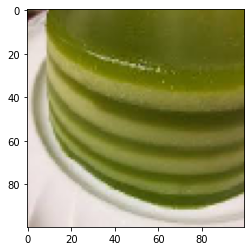

In [ ]:
import numpy as np
from tensorflow.keras.utils import load_img,img_to_array
img = load_img('banhdalon.jpg', target_size = (100,100))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,100,100,3) 
img = img.astype('float32')
img = img/255
print(label[np.argmax(model.predict(img))])